# Knowledge Engineering and Digital Humanities (SoSe 2020)

---

## Exercise 5.3 - Information Extraction and Knowledge Graphs

#### M.Sc. Erasmo Purificato

---

In [38]:
import nltk
import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt

In [39]:
# Install the spaCy's model for English
# !python -m spacy download en_core_web_sm

In [40]:
nlp_model = spacy.load("en_core_web_sm") # load spaCy's model for English

In [41]:
text = "London is the capital and largest city of England and the United Kingdom. Standing on the River " \
        "Thames in the south-east of England, at the head of its 50-mile (80 km) estuary leading to " \
        "the North Sea, London has been a major settlement for two millennia. " \
        "Londinium was founded by the Romans. The City of London, " \
        "London's ancient core − an area of just 1.12 square miles (2.9 km2) and colloquially known as " \
        "the Square Mile − retains boundaries that follow closely its medieval limits." \
        "The City of Westminster is also an Inner London borough holding city status. " \
        "Greater London is governed by the Mayor of London and the London Assembly." \
        "London is located in the southeast of England." \
        "Westminster is located in London." \
        "London is the biggest city in Britain. London has a population of 7,172,036."

In [42]:
def get_sentences(text):
    nlp_model.add_pipe("sentencizer")
    doc = nlp_model(text)
    return[str(sent).strip() for sent in doc.sents]

    # WRITE YOUR CODE - Use spaCy to split the text in sentences

In [43]:
# DON'T DO ANYTHING
def print_token(token):
    print(token.text, "->", token.dep_)

def append_chunk(original, chunk):
    return original + ' ' + chunk

def is_relation_candidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)

def is_construction_candidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)

In [44]:
# COMMENT THE FOLLOWING FUNCTION
def process_subject_object_pairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subject_construction = ''
    object_construction = ''
    for token in tokens:
        print_token(token)
        if "punct" in token.dep_:
            continue
        if is_relation_candidate(token):
            relation = append_chunk(relation, token.lemma_)
        if is_construction_candidate(token):
            if subject_construction:
                subject_construction = append_chunk(subject_construction, token.text)
            if object_construction:
                object_construction = append_chunk(object_construction, token.text)
        if "subj" in token.dep_:
            subject = append_chunk(subject, token.text)
            subject = append_chunk(subject_construction, subject)
            subject_construction = ''
        if "obj" in token.dep_:
            object = append_chunk(object, token.text)
            object = append_chunk(object_construction, object)
            object_construction = ''

    print (subject.strip(), ",", relation.strip(), ",", object.strip())
    return (subject.strip(), relation.strip(), object.strip())
 

In [45]:
import networkx as nx

def print_graph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])

    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(G, pos, edge_color='blue', width=1, linewidths=1,
            node_size=500, node_color='green', alpha=0.7,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show() 
    
    
    # WRITE YOUR CODE - Use NetworkX to build and show the knowledge graph

In [46]:
def process_sentence(sentence):
    tokens = nlp_model(sentence)
    return process_subject_object_pairs(tokens)

London -> nsubj
is -> ROOT
the -> det
capital -> attr
and -> cc
largest -> amod
city -> conj
of -> prep
England -> pobj
and -> cc
the -> det
United -> compound
Kingdom -> conj
. -> punct
London , be capital large , England
Standing -> advcl
on -> prep
the -> det
River -> compound
Thames -> pobj
in -> prep
the -> det
south -> compound
- -> punct
east -> pobj
of -> prep
England -> pobj
, -> punct
at -> prep
the -> det
head -> pobj
of -> prep
its -> poss
50 -> nummod
- -> punct
mile -> nmod
( -> punct
80 -> nummod
km -> pobj
) -> punct
estuary -> dep
leading -> xcomp
to -> prep
the -> det
North -> compound
Sea -> pobj
, -> punct
London -> nsubj
has -> aux
been -> ROOT
a -> det
major -> amod
settlement -> attr
for -> prep
two -> nummod
millennia -> pobj
. -> punct
London , be major settlement , Thames east England head km Sea millennia
Londinium -> nsubjpass
was -> auxpass
founded -> ROOT
by -> agent
the -> det
Romans -> pobj
. -> punct
Londinium , found by , Romans
The -> det
City -> nsub

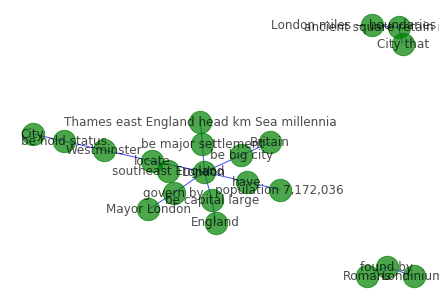

In [47]:
sentences = get_sentences(text)

triples = []
for s in sentences:
    triples.append(process_sentence(s))
    
print_graph(triples)